# Medical Cost Personal Dataset


### 1. Understanding Data:
**Columns:**
* Features (labels or independent variables or predictors) [7]:
  * age: age of primary beneficiary

  * sex: insurance contractor gender, female, male

  * bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

  * children: Number of children covered by health insurance / Number of dependents

  * smoker: Smoking

  * region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* Output (dependent variable or to-predict)
  * charges: Individual medical costs billed by health insurance

**Inspiration:**
Can you accurately predict insurance costs?

**Reference to raw csv file:** https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

# import plotting libraries
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from IPython.display import display

# model visualizatio library
from tensorflow.keras.utils import plot_model

random_seed=42

2025-02-25 12:54:31.396959: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# reading the csv data using pandas
dataset=pd.read_csv('dataset.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Preprocessing:

In [3]:
# Step 1: one-hot encode all categorical features
dataset_ohe=pd.get_dummies(dataset)
dataset_ohe.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [4]:
# Step 2: Split the features and labels
X = dataset_ohe.drop('charges',axis=1) # axis = 1 is for columnwise
print(X.columns)

# y=dataset_ohe['charges'] 
y=dataset_ohe.drop(X.columns,axis=1) 
print(y.columns)

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
Index(['charges'], dtype='object')


In [5]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [6]:
# view y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [7]:
# creating training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=random_seed)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [8]:
# view X_train
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,True,False,True,False,False,True,False,False
1285,47,24.32,0,True,False,True,False,True,False,False,False
1142,52,24.86,0,True,False,True,False,False,False,True,False
969,39,34.32,5,True,False,True,False,False,False,True,False
486,54,21.47,3,True,False,True,False,False,True,False,False


In [9]:
X_train.columns,X_train.shape

(Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
        'smoker_yes', 'region_northeast', 'region_northwest',
        'region_southeast', 'region_southwest'],
       dtype='object'),
 (1070, 11))

**Details after pre-processing**
* Total input features: 11 <br>
    X = ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest','region_southeast', 'region_southwest']
* Total output features: 1 <br>
    y = ['charges']

**Note:** 
* We don't need to convert it to tensors as pandas is built on numpy, and tensorflow also, hence it excepts them as it is

### 3. Building the neural network for regression:

In [34]:
# setting the random seed
tf.random.set_seed(random_seed)

**Model 1**

/home/rudraksha14/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


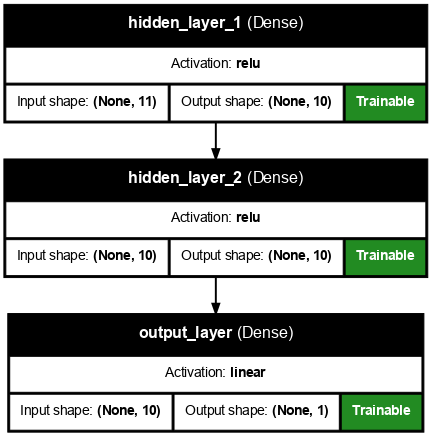

Model: "model_mcp_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

None

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 263542240.0000 - mse: 263542240.0000  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126389000.0000 - mse: 126389000.0000 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119112384.0000 - mse: 119112384.0000 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111575752.0000 - mse: 111575752.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98878392.0000 - mse: 98878392.0000  
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74141624.0000 - mse: 74141624.0000 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49710936.0000 - mse: 49710936.0000 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41042580.0000 - mse: 41042580.0000 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40366176.0000 - mse: 40366176.0000 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39009968.0000 - mse: 39009968.0000 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [59]:
# hyperparams:
learning_rate=0.1
epochs=100

# creating the model:
model1=tf.keras.Sequential(name="model_mcp_1")

# adding 2 hidden layers (each with 10 neurons) and output layer with 1 neuron
model1.add(tf.keras.layers.Dense(10,input_shape=[11],activation='relu',name='hidden_layer_1'))
model1.add(tf.keras.layers.Dense(10,activation='relu',name='hidden_layer_2'))
model1.add(tf.keras.layers.Dense(1,name='output_layer'))

# compiling the model
model1.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['mse']
)

# visulize model and get summary

display(plot_model(
    model=model1,
    show_dtype=False,
    show_shapes=True, 
    rankdir='TB',  # 'TB' for top-to-bottom layout, 'LR' for left-to-right
    show_layer_names=True,  # Optional: Shows layer names
    dpi=70,  # Reduce DPI to make it smaller
    expand_nested=True,  # Optional: Expands nested models if present
    show_layer_activations=True,
    show_trainable=True,
    # to_file='model.png' # File name of the plot image,
))

display(model1.summary())

# fitting the model
history1 = model1.fit(X_train,y_train,epochs=epochs)

MAE loss: 4034.691650390625


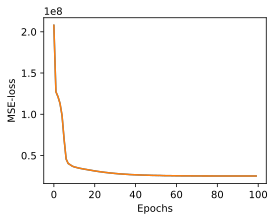

In [60]:
# Evaluating model1:
# plot history (loss curve or training curve)
pd.DataFrame(history1.history).plot(figsize=(4,3),xlabel="Epochs",ylabel="MSE-loss",legend=False);

# evaluating using MAE:
print(f"MAE loss: {tf.metrics.mae(tf.squeeze(y_test),tf.squeeze(model1.predict(X_test,verbose=0))).numpy()}")


**Model 2**

/home/rudraksha14/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


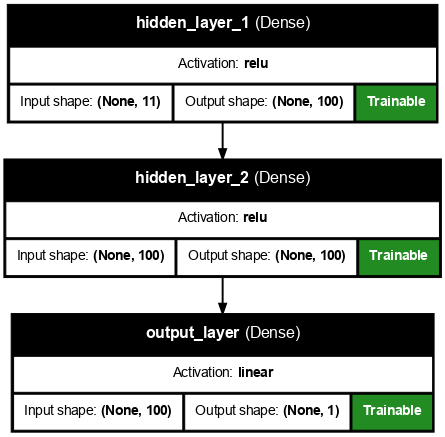

Model: "model_mcp_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,401 (44.54 KB)

 Trainable params: 11,401 (44.54 KB)

 Non-trainable params: 0 (0.00 B)

None

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 203756832.0000 - mse: 203756832.0000   
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112100152.0000 - mse: 112100152.0000
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64534420.0000 - mse: 64534420.0000
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49040144.0000 - mse: 49040144.0000
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40789672.0000 - mse: 40789672.0000 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42889256.0000 - mse: 42889256.0000 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44903468.0000 - mse: 44903468.0000
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45667572.0000 - mse: 45667572.0000 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44845740.0000 - mse: 44845740.0000 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43892816.0000 - mse: 43892816.0000 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [61]:
# hyperparams:
learning_rate=0.1
epochs=200

# creating the model:
model1=tf.keras.Sequential(name="model_mcp_1")

# adding 2 hidden layers (each with 10 neurons) and output layer with 1 neuron
model1.add(tf.keras.layers.Dense(100,input_shape=[11],activation='relu',name='hidden_layer_1'))
model1.add(tf.keras.layers.Dense(100,activation='relu',name='hidden_layer_2'))
model1.add(tf.keras.layers.Dense(1,name='output_layer'))

# compiling the model
model1.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['mse']
)

# visulize model and get summary

display(plot_model(
    model=model1,
    show_dtype=False,
    show_shapes=True, 
    rankdir='TB',  # 'TB' for top-to-bottom layout, 'LR' for left-to-right
    show_layer_names=True,  # Optional: Shows layer names
    dpi=70,  # Reduce DPI to make it smaller
    expand_nested=True,  # Optional: Expands nested models if present
    show_layer_activations=True,
    show_trainable=True,
    # to_file='model.png' # File name of the plot image,
))

display(model1.summary())

# fitting the model
history2 = model1.fit(X_train,y_train,epochs=epochs)

MAE loss: 3827.1298828125


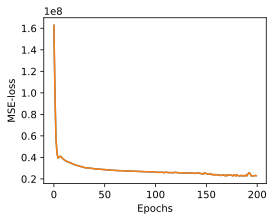

In [62]:
# Evaluating model1:
# plot history (loss curve or training curve)
pd.DataFrame(history2.history).plot(figsize=(4,3),xlabel="Epochs",ylabel="MSE-loss",legend=False);

# evaluating using MAE:
print(f"MAE loss: {tf.metrics.mae(tf.squeeze(y_test),tf.squeeze(model1.predict(X_test,verbose=0))).numpy()}")


**Conclusion: Our current model is not performing too well, it needs improvements**
<br>
<br>
`Continued in next notebook`